In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

from tqdm import tqdm
import pickle

import swimAD2 as ad2       
import time
import dwfconstants as dwfc

import threading
ad2.disconnect()            
zoroku = ad2.connect(0)      #彼は老人
alice = ad2.connect(1)      #彼女はアンドロイド

In [109]:
def sampling_h(time):
    # Priority on oscilloscope hertz
    hertz = 100e6
    size = time*hertz 
    if size <= 8192:
        return size,hertz
    else: 
        size = 8192
        return size,hertz

def sampling_s(time):
    # Priority on data size
    size = 8192
    hertz = size/time
    if hertz <= 100e6:
        return size,hertz
    else: 
        hertz = 100e6
        return size,hertz

In [116]:
size,rate = sampling_s(1)
    
range = 5
shape = dwfc.funcSine
def config():
    ad2.config_oscilloscope(devices,
        range0=range,
        range1=range,
        sample_rate = rate,
        sample_size= size,
        )
    ad2.config_wavegen(zoroku, 
        frequency=1200,
        amplitude=0.5,
        signal_shape=shape
        )
def measure():
    for devices in [zoroku,alice]:
        thread = threading.Thread(name=devices, target=ad2)
for devices in [zoroku,alice]:
    ad2.config_oscilloscope(devices,
        range0=rng,
        range1=rng,
        sample_rate = rate,
        sample_size= size,
        )

ad2.config_wavegen(zoroku, 
        frequency=1200,
        amplitude=0.5,
        signal_shape=dwfc.funcSine
        )

ad2.start_wavegen(zoroku,channel=0)
time.sleep(0.1)

t0,ch1,Ch2 = ad2.measure_oscilloscope(zoroku)
t1,ch2,ch3 = ad2.measure_oscilloscope(alice)

ad2.stop_wavegen(zoroku,channel=0)
ad2.reset_wavegen(zoroku,channel=0)

data = [t0,ch1,Ch2,t1,ch2,ch3]

handle = open("chua_troubleshoot.pkl", 'wb')
pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)
handle.close()

meas = sync_series(t0,ch1,Ch2,ch2,ch3)

0.024404346233181395 f


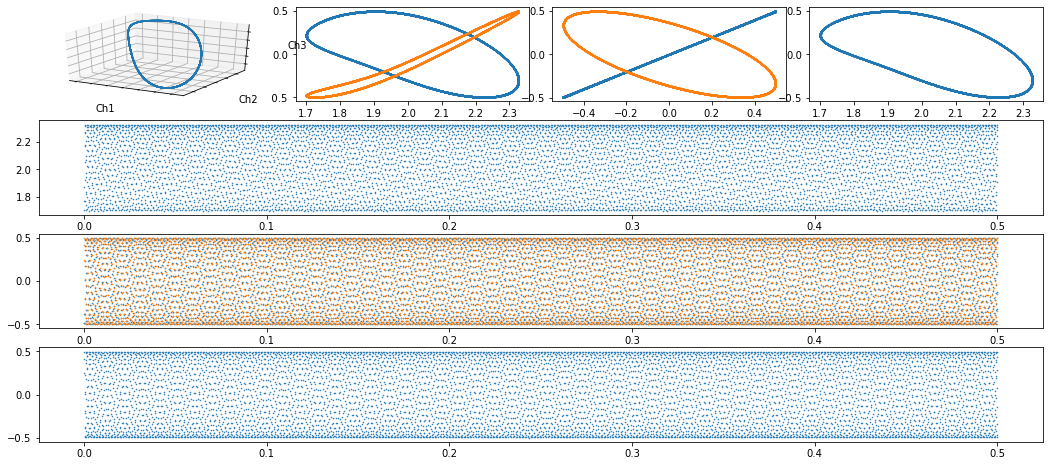

In [117]:
# No syncing involved

fig = plt.figure(figsize=(18,8))
grid = gs.GridSpec(4,4,wspace=0.1,)

XY = plt.subplot(grid[0,1])
YZ = plt.subplot(grid[0,2])
XZ = plt.subplot(grid[0,3])

XT = plt.subplot(grid[1,:])
YT = plt.subplot(grid[2,:])
ZT = plt.subplot(grid[3,:])

XT.scatter(t0,ch1,s=0.3)
YT.scatter(t0,Ch2,s=0.3)
YT.scatter(t1,ch2,s=0.3)
ZT.scatter(t1,ch3,s=0.3)

XY.scatter(ch1,ch2,s=0.3)
XY.scatter(ch1,Ch2,s=0.3)
YZ.scatter(ch2,ch3,s=0.3)
YZ.scatter(Ch2,ch3,s=0.3)
XZ.scatter(ch1,ch3,s=0.3)

plot3D = fig.add_subplot(grid[0,0],projection='3d')
plot3D.scatter(*meas[1:],s=0.3)
plot3D.set_xlabel("Ch1")
plot3D.set_ylabel("Ch2")
plot3D.set_zlabel("Ch3")

plot3D.set_xticklabels([])
plot3D.set_yticklabels([])
plot3D.set_zticklabels([])

plt.show()

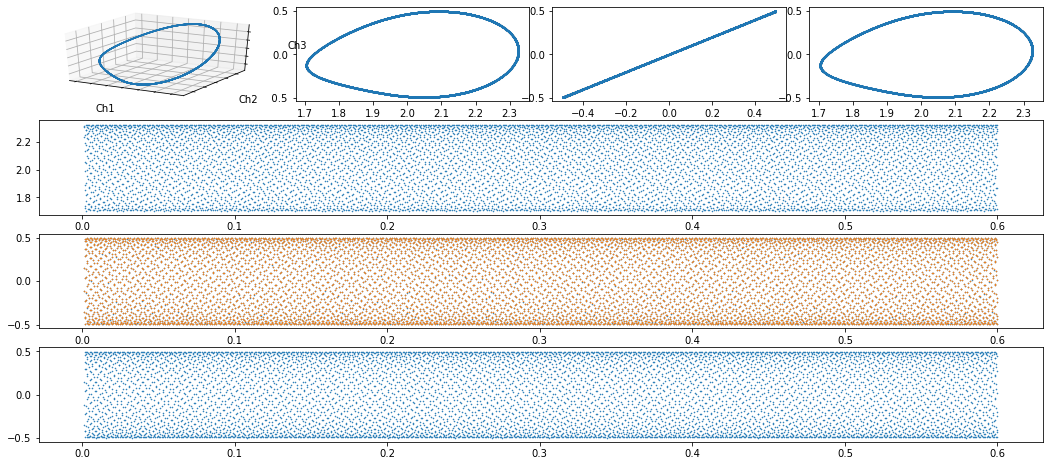

In [106]:
# All synced

t,ch1,ch2,ch3 = meas

fig = plt.figure(figsize=(18,8))
grid = gs.GridSpec(4,4,wspace=0.1,)

XY = plt.subplot(grid[0,1]); YZ = plt.subplot(grid[0,2]); XZ = plt.subplot(grid[0,3])

XT = plt.subplot(grid[1,:]); YT = plt.subplot(grid[2,:]); ZT = plt.subplot(grid[3,:])

XT.scatter(t,ch1,s=0.3)
YT.scatter(t,ch2,s=0.3); YT.scatter(t,ch3,s=0.3)
ZT.scatter(t,ch3,s=0.3)

XY.scatter(ch1,ch2,s=0.3)
YZ.scatter(ch2,ch3,s=0.3)
XZ.scatter(ch1,ch3,s=0.3)

plot3D = fig.add_subplot(grid[0,0],projection='3d')
plot3D.scatter(*meas[1:],s=0.3)
plot3D.set_xlabel("Ch1")
plot3D.set_ylabel("Ch2")
plot3D.set_zlabel("Ch3")

plot3D.set_xticklabels([])
plot3D.set_yticklabels([])
plot3D.set_zticklabels([])

plt.show()

NameError: name 'measurements' is not defined

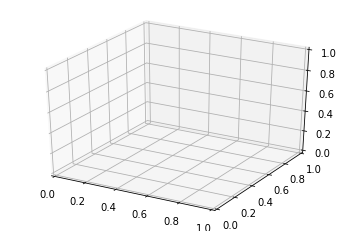

In [7]:
fig = plt.figure() 
ax = fig.add_subplot(projection='3d')

ax.scatter(*measurements[1:],s=0.3)
ax.set_xlabel("Channel 1")
ax.set_ylabel("Channel 2")
ax.set_zlabel("Channel 3")
ax.set_title("Chua's circuit")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()